In [3]:
import numpy as np
import pandas as pd 
import pyphot

In [9]:
pd.read_pickle('CWW_HDFN_prior.pkl')

{'fo_arr': array([0.35, 0.5 ]),
 'kt_arr': array([0.45 , 0.147]),
 'zo_arr': array([0.431 , 0.39  , 0.0626]),
 'km_arr': array([0.0913, 0.0636, 0.123 ]),
 'a_arr': array([2.465, 1.806, 0.906]),
 'mo': 20.0,
 'nt_array': [1, 2, 5]}

In [333]:
cd ../FILTER

/Users/bryan/Desktop/DESC_BPZ-main/src/desc_bpz/data_files/FILTER


In [309]:
cd DESC_BPZ-main/

[Errno 2] No such file or directory: 'DESC_BPZ-main/'
/Users/bryan/Desktop/DESC_BPZ-main/src/desc_bpz/data_files/FILTER


In [11]:
ls

LICENSE         pyproject.toml  src/
README.md       setup.py        tests/


In [12]:
cd src

/Users/bryan/Desktop/DESC_BPZ-main/src


In [13]:
ls

desc_bpz/


In [14]:
cd desc_bpz/

/Users/bryan/Desktop/DESC_BPZ-main/src/desc_bpz


In [15]:
ls

MLab_coe_py3.py*    coetools_py3.py*    paths.py            spline_py3.py*
__init__.py         compress2_py3.py*   prior_from_dict.py  useful_py3.py*
bpz_tools_py3.py*   data_files/         prior_hdfn_gen.py   version.py
coeio_py3.py*       func_py3.py*        scripts/            will_tools_py3.py*


In [16]:
cd data_files

/Users/bryan/Desktop/DESC_BPZ-main/src/desc_bpz/data_files


In [17]:
ls

AB/     FILTER/ SED/


In [72]:
ls

DC2LSST_g.res  DC2LSST_r.res  DC2LSST_y.res
DC2LSST_i.res  DC2LSST_u.res  DC2LSST_z.res


In [71]:
filelist = ['SB2_B2004a.sed', 'Scd_B2004a.sed', 
'El_B2004a.sed', 'SB3_B2004a.sed', 'Im_B2004a.sed',      
'Sbc_B2004a.sed', ]

SB2_B2004a.sed
Scd_B2004a.sed
El_B2004a.sed
SB3_B2004a.sed
Im_B2004a.sed
Sbc_B2004a.sed


(0.0, 10000.0)

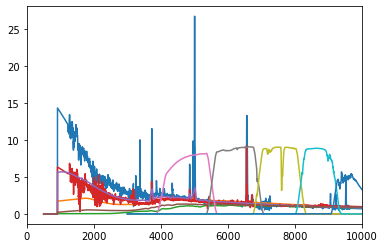

In [329]:
templates = {}

for filename in filelist:
    
    print(filename)
    
    waves = pd.read_csv(filename, delimiter = ' ')['0.0']
    fluxes = pd.read_csv(filename, delimiter = ' ')['0.0.1']
    
    templates[filename] = waves, fluxes
    
    plt.plot(waves, fluxes)

    
plt.plot(LSST_fil_list[0].wavelength, 20*LSST_fil_list[0].transmit)
plt.plot(LSST_fil_list[1].wavelength, 20*LSST_fil_list[1].transmit)
plt.plot(LSST_fil_list[2].wavelength, 20*LSST_fil_list[2].transmit)
plt.plot(LSST_fil_list[3].wavelength, 20*LSST_fil_list[3].transmit)
plt.plot(LSST_fil_list[4].wavelength, 20*LSST_fil_list[4].transmit)

plt.xlim(0, 10000)

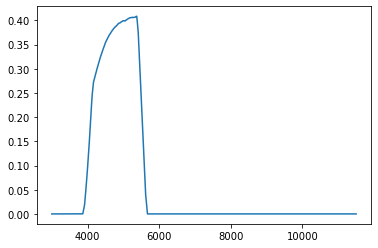

In [307]:
plt.plot(LSST_fil_list[0].wavelength, LSST_fil_list[0].transmit)

In [73]:
from pyphot import (unit, Filter)

wave = [4499, 4500, 4700, 4701] * unit['AA']
transmit = [0., 1., 1., 0.]
tophat = Filter(wave, transmit, name='tophat', dtype='photon', unit='Angstrom')
flux_tophat = tophat.get_flux(wavelength, flux)

TypeError: only integer scalar arrays can be converted to a scalar index

In [112]:
LSST_filters = ['DC2LSST_g.res', 'DC2LSST_r.res', 'DC2LSST_y.res', 'DC2LSST_i.res', 'DC2LSST_z.res']

transmission_wavelength = pd.read_csv(LSST_filters[0], delimiter = ' ')['#Wavelength(AA)']
transmission = pd.read_csv(LSST_filters[0], delimiter = ' ')['Transmission']

In [93]:
LSST_G = Filter(transmission_wavelength, transmission, name='LSST_G', unit='Angstrom')

In [97]:
fluxes = LSST_G.get_flux(np.array(templates['SB2_B2004a.sed'][0]), np.array(templates['SB2_B2004a.sed'][1]), axis=0)

In [99]:
ABmag=-2.5*np.log10(fluxes)-LSST_G.AB_zero_mag

In [106]:
for fil in LSST_filters:
    print(fil)

DC2LSST_g.res
DC2LSST_r.res
DC2LSST_y.res
DC2LSST_i.res
DC2LSST_u.res
DC2LSST_z.res


In [291]:
mags = []
mags_dict = {}

LSST_fil_list = []

for template in filelist: 
    
    print(template)
    for fil in LSST_filters: 
    
        print(fil)
    
        transmission_wavelength = pd.read_csv(fil, delimiter = ' ')['#Wavelength(AA)']
        transmission = pd.read_csv(fil, delimiter = ' ')['Transmission']
    
        LSST_fil = Filter(transmission_wavelength, transmission, unit='Angstrom')
        LSST_fil_list.append(LSST_fil)
        
        fluxes = LSST_fil.get_flux(np.array(templates[template][0]), np.array(templates[template][1]), axis=0)
    
        ABmag=-2.5*np.log10(fluxes)
    
        mags.append(ABmag)
    mags_dict[template] = np.diff(mags)

SB2_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Scd_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
El_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
SB3_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Im_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
Sbc_B2004a.sed
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res


In [121]:
mags_dict

{'SB2_B2004a.sed': array([-0.11118664, -0.22695697,  0.21514785, -0.15124183]),
 'Scd_B2004a.sed': array([-0.41648171, -0.31137859,  0.11751674, -0.05407989]),
 'El_B2004a.sed': array([-0.6932412 , -0.67564111,  0.31943232, -0.20533849]),
 'SB3_B2004a.sed': array([-0.38075186, -0.50326433,  0.41029608, -0.2589207 ]),
 'Im_B2004a.sed': array([-0.19490238, -0.34099667,  0.17490197, -0.08703323]),
 'Sbc_B2004a.sed': array([-0.53474596, -0.64081681,  0.34973268, -0.16437906])}

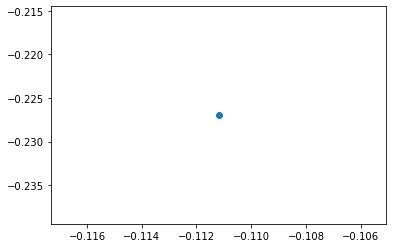

In [122]:
plt.scatter(mags_dict['SB2_B2004a.sed'][0], mags_dict['SB2_B2004a.sed'][1])

In [254]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.luminosity_distance(4) 

<Quantity 35851.83207232 Mpc>

In [263]:
cosmo.luminosity_distance(0.01).value**2

1862.6332545240057

In [353]:
mags = []
mags_dict = {}
redshift_dict = {}

redshifts = np.linspace(0.01, 3, 100)

for template in filelist: 
    
    print(template)
    
    redshift_dict = {}
    
    for z in redshifts:
        
        print(z)
        
        mags = []
    
        for fil in LSST_filters: 
    
            print(fil)
    
            transmission_wavelength = pd.read_csv(fil, delimiter = ' ')['#Wavelength(AA)']
            transmission = pd.read_csv(fil, delimiter = ' ')['Transmission']
    
            LSST_fil = Filter(transmission_wavelength, transmission, unit='Angstrom')
    
        
            fluxes = LSST_fil.get_flux((1+z)*np.array(templates[template][0]), np.array(templates[template][1])/(4*np.pi*cosmo.luminosity_distance(z).value**2) , axis=0)
    
            ABmag=-2.5*np.log10(fluxes)-LSST_fil.AB_zero_mag
    
            mags.append(ABmag)
        
        redshift_dict[z] = np.diff(np.flip(mags), axis = -1)
        
    mags_dict[template] = redshift_dict

SB2_B2004a.sed
0.01
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.040202020202020204
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.07040404040404041
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.10060606060606062
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.13080808080808082
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.16101010101010105
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.19121212121212125
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.22141414141414145
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.2516161616161616
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.28181818181818186
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3120202020202021
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.342222222

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0972727272727274
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.1274747474747475
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.1576767676767679
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.187878787878788
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2180808080808083
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2482828282828284
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2784848484848486
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.308686868686869
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.338888888888889
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3690909090909094
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3992929292929295
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.

DC2LSST_y.res
2.0939393939393938
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1241414141414143
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1543434343434344
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1845454545454546
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.2147474747474747
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.244949494949495
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.2751515151515154
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3053535353535355
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3355555555555556
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3657575757575757
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616

DC2LSST_y.res
0.040202020202020204
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.07040404040404041
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.10060606060606062
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.13080808080808082
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.16101010101010105
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.19121212121212125
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.22141414141414145
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.2516161616161616
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.28181818181818186
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3120202020202021
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.34222222222222226
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.r

0.9160606060606061
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9462626262626264
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9764646464646466
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0066666666666668
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.036868686868687
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0670707070707073
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.0972727272727274
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.1274747474747475
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.1576767676767679
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.187878787878788
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2180808080808083
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2482828282828284
DC2L

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8523232323232326
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8825252525252527
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.912727272727273
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9429292929292932
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9731313131313133
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0033333333333334
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0335353535353535
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0637373737373736
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.0939393939393938
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1241414141414143
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1543434343434344
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7885858585858587
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.818787878787879
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.848989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.8791919191919195
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.9093939393939396
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.9395959595959598
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.96979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
3.0
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
El_B2004a.sed
0.01
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.040202020202020204
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.07040404040404041
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z

DC2LSST_z.res
DC2LSST_y.res
0.6744444444444445
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7046464646464647
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.734848484848485
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7650505050505052
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7952525252525253
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.8254545454545456
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.8556565656565658
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.885858585858586
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9160606060606061
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9462626262626264
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.9764646464646466
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y

1.610707070707071
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.640909090909091
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.6711111111111112
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7013131313131316
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7315151515151517
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.761717171717172
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7919191919191921
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8221212121212123
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8523232323232326
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.8825252525252527
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.912727272727273
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.9429292929292932
DC2LSS

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5771717171717174
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6073737373737376
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6375757575757577
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.667777777777778
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.697979797979798
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7281818181818185
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7583838383838386
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.7885858585858587
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.818787878787879
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.848989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.8791919191919195
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.r

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4932323232323233
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5234343434343435
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5536363636363637
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5838383838383839
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6140404040404042
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6442424242424243
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.6744444444444445
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7046464646464647
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.734848484848485
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7650505050505052
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.7952525252525253
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_

DC2LSST_y.res
1.3992929292929295
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.4294949494949496
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.45969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.48989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5201010101010104
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5503030303030305
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5805050505050506
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.610707070707071
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.640909090909091
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.6711111111111112
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.7013131313131316
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.73151515151

DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3657575757575757
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616161616164
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4563636363636365
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4865656565656566
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5167676767676768
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.546969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5771717171717174
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6073737373737376
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6375757575757577
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.667777777777778
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.

0.2516161616161616
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.28181818181818186
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3120202020202021
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.34222222222222226
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3724242424242425
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.40262626262626267
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4328282828282829
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.46303030303030307
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4932323232323233
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5234343434343435
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5536363636363637
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.583838383838383

DC2LSST_z.res
DC2LSST_y.res
1.2784848484848486
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.308686868686869
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.338888888888889
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3690909090909094
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3992929292929295
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.4294949494949496
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.45969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.48989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5201010101010104
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5503030303030305
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5805050505050506
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res

DC2LSST_y.res
2.3657575757575757
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616161616164
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4563636363636365
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4865656565656566
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5167676767676768
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.546969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.5771717171717174
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6073737373737376
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.6375757575757577
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.667777777777778
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.69797979

0.2516161616161616
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.28181818181818186
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3120202020202021
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.34222222222222226
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.3724242424242425
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.40262626262626267
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4328282828282829
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.46303030303030307
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.4932323232323233
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5234343434343435
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.5536363636363637
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
0.583838383838383

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2180808080808083
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2482828282828284
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.2784848484848486
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.308686868686869
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.338888888888889
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3690909090909094
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.3992929292929295
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.4294949494949496
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.45969696969697
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.48989898989899
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
1.5201010101010104
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res

DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1543434343434344
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.1845454545454546
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.2147474747474747
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.244949494949495
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.2751515151515154
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3053535353535355
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3355555555555556
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.3657575757575757
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.395959595959596
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4261616161616164
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i.res
DC2LSST_z.res
DC2LSST_y.res
2.4563636363636365
DC2LSST_g.res
DC2LSST_r.res
DC2LSST_i

In [352]:
np.flip(mags)

array([3.2559224 , 3.43470919, 3.6554992 , 4.23356289, 5.13295341])

In [214]:
templates[filelist[1]][1]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1776    0.089341
1777    0.084843
1778    0.081613
1779    0.080379
1780    0.083254
Name: 0.0.1, Length: 1781, dtype: float64

In [230]:
LSST_filters = ['DC2LSST_g.res', 'DC2LSST_r.res', 'DC2LSST_i.res', 'DC2LSST_z.res', 'DC2LSST_y.res'
]

/var/folders/l8/2kslmt113c99klvtjpdbnghm0000gn/T/ipykernel_18834/1475257479.py:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(ax0)


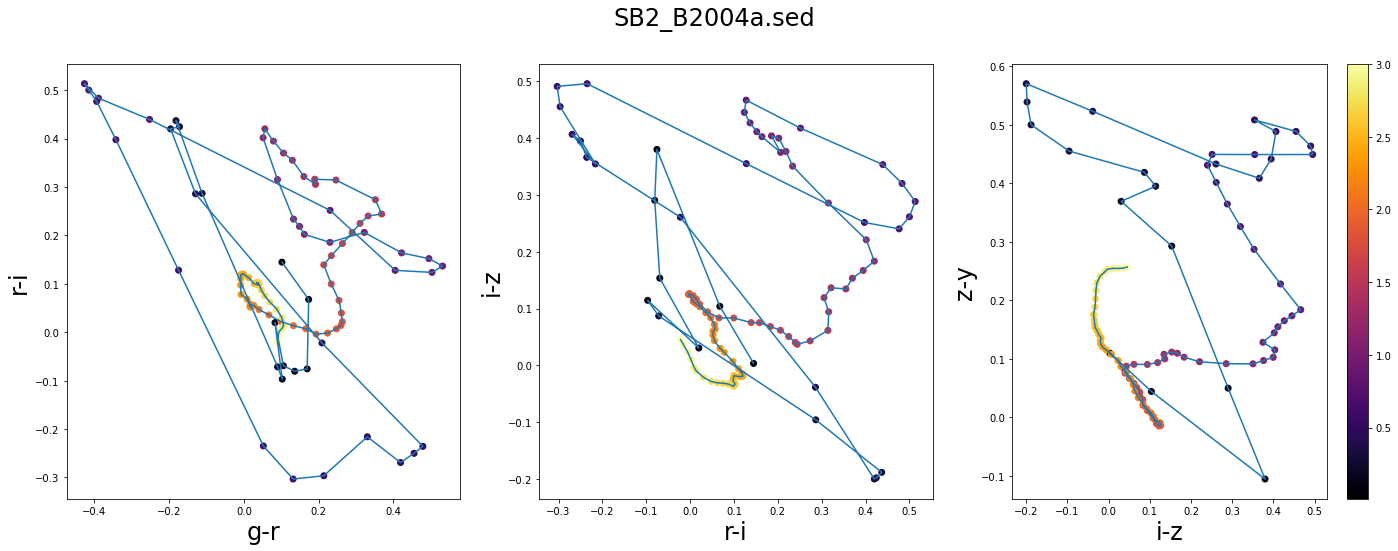

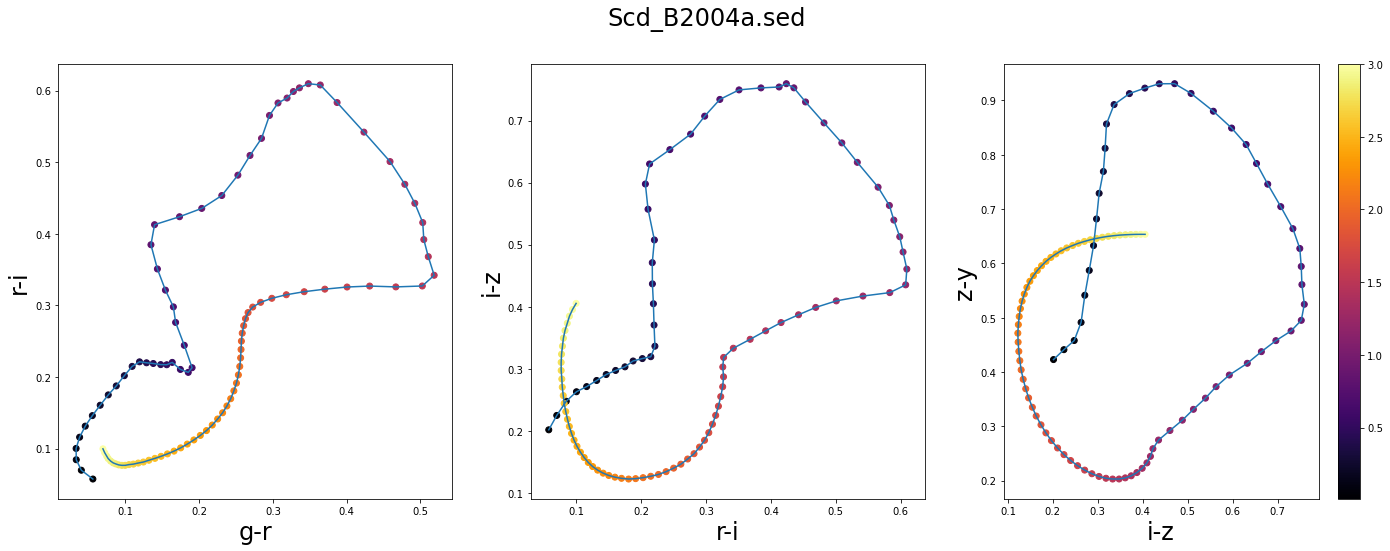

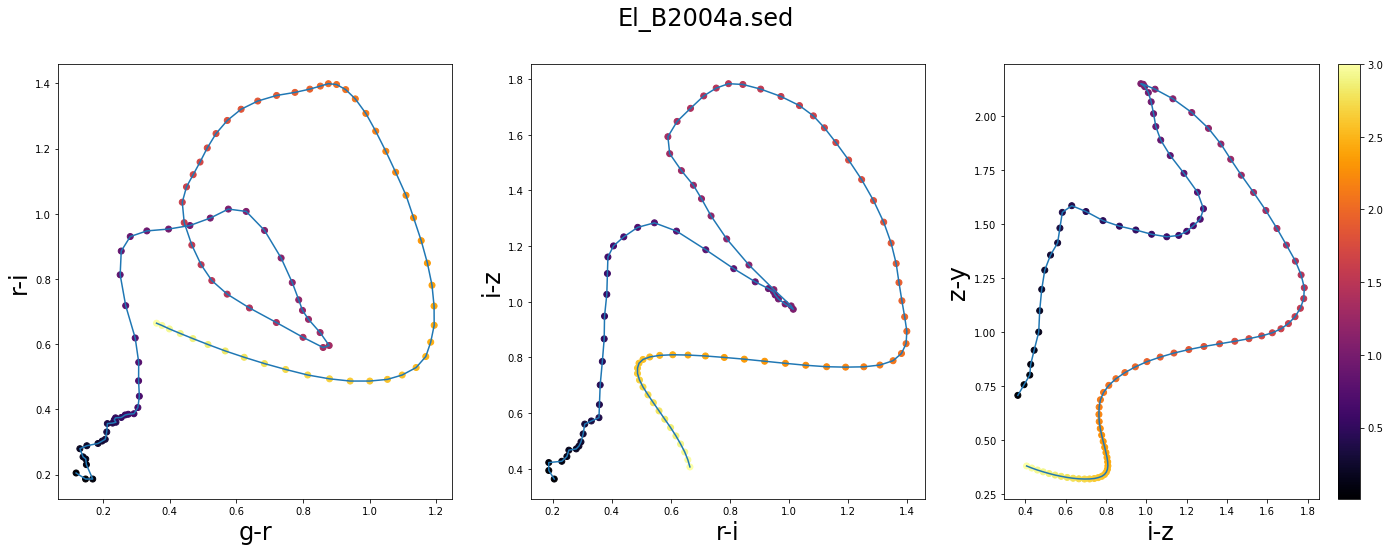

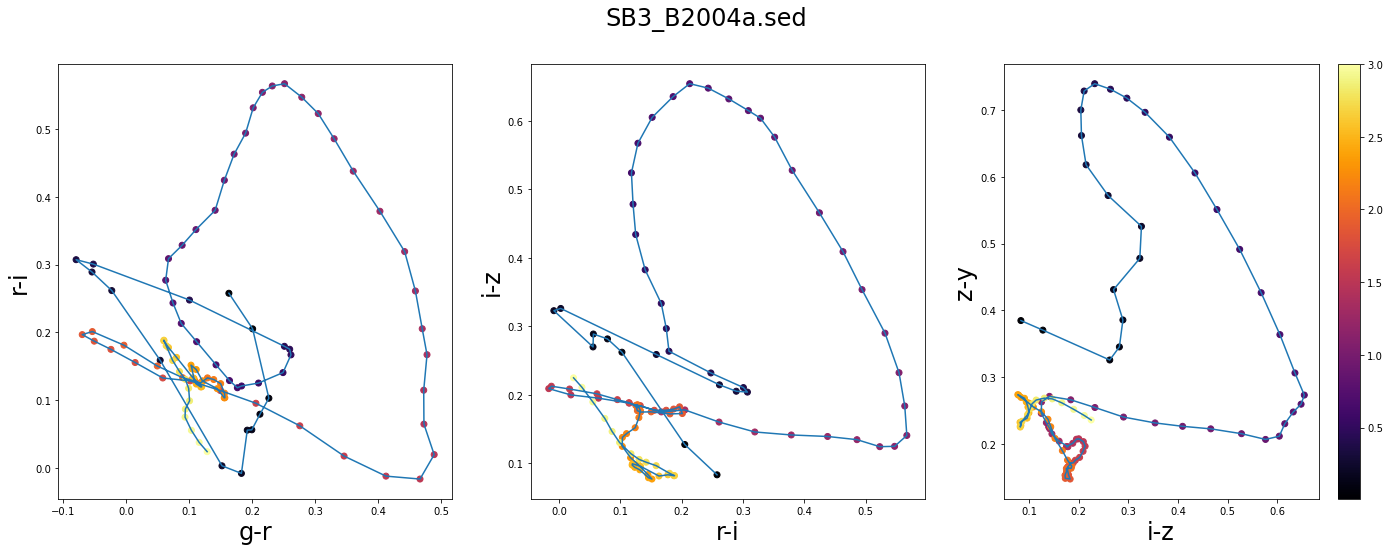

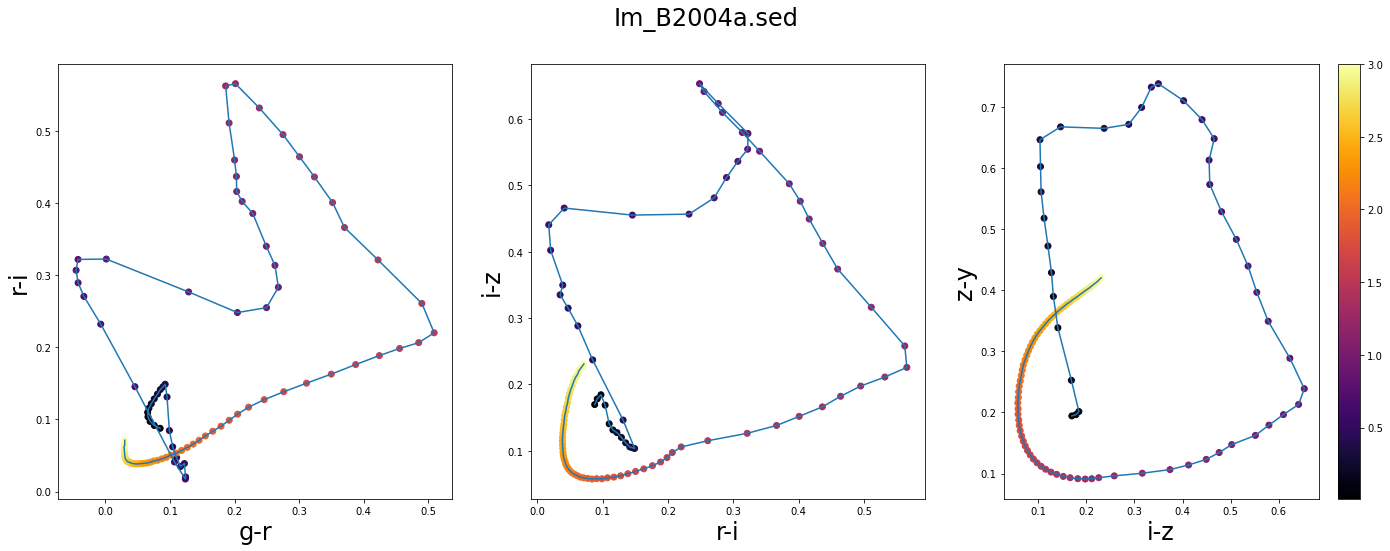

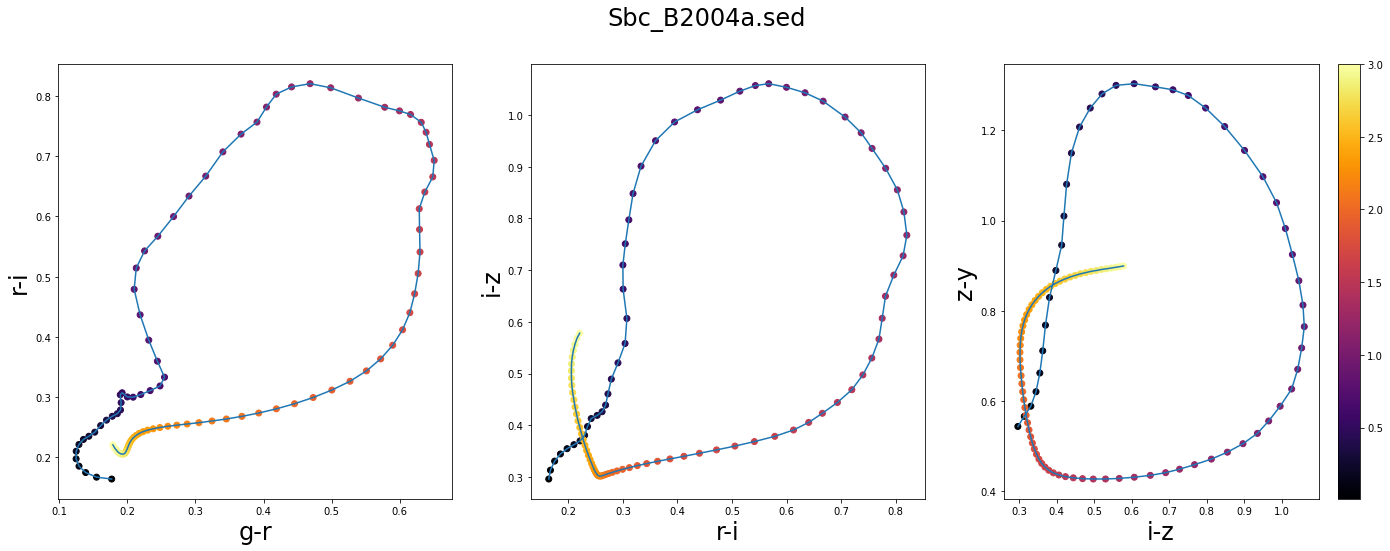

In [354]:
for filename in filelist:
    
    color1 = []
    color2 = []
    
    fig, ax = plt.subplots(1,3, figsize = (24, 8))


    for z in redshifts:
    
        color1.append(mags_dict[filename][z][0]) 
        color2.append(mags_dict[filename][z][1]) 
    
    ax0 = ax[0].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[0].plot(color1, color2)
    ax[0].set_xlabel('g-r', fontsize = 24)
    ax[0].set_ylabel('r-i', fontsize = 24)

    color1 = []
    color2 = []

    for z in redshifts:
    
        color1.append(mags_dict[filename][z][1]) 
        color2.append(mags_dict[filename][z][2]) 
    
    ax[1].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[1].plot(color1, color2)
    ax[1].set_xlabel('r-i', fontsize = 24)
    ax[1].set_ylabel('i-z', fontsize = 24)

    color1 = []
    color2 = []

    for z in redshifts:
    
        color1.append(mags_dict[filename][z][2])
        color2.append(mags_dict[filename][z][3])
    
    ax[2].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[2].plot(color1, color2)
    ax[2].set_xlabel('i-z', fontsize = 24)
    ax[2].set_ylabel('z-y', fontsize = 24)
    
    fig.suptitle(filename, fontsize = 24)
    
    fig.colorbar(ax0)
    
plt.show()

In [237]:
?plt.colorbar

In [170]:
filename = Scd_B2004a.sed

color1 = []
color2 = []

for z in np.linspace(0, 3, 50):
    
    color1.append(mags_dict[filename][z][0])
    color2.append(mags_dict[filename][z][1])
    
plt.scatter(color1, color2, cmap="plasma", c = np.linspace(0, 3, 50))
plt.colorbar()
plt.show()

color1 = []
color2 = []

for z in np.linspace(0, 3, 50):
    
    color1.append(mags_dict[filename][z][1])
    color2.append(mags_dict[filename][z][2])
    
plt.scatter(color1, color2, cmap="plasma", c = np.linspace(0, 3, 50))
plt.colorbar()
plt.show()

color1 = []
color2 = []

for z in np.linspace(0, 3, 50):
    
    color1.append(mags_dict[filename][z][2])
    color2.append(mags_dict[filename][z][3])
    
plt.scatter(color1, color2, cmap="plasma", c = np.linspace(0, 3, 50))
plt.colorbar()
plt.show()

[-0.6408168110254913,
 -0.6351753102376136,
 -0.6492466014100629,
 -0.6717801595636104,
 -0.6991284321209861,
 -0.7305550728219288,
 -0.768956729718667,
 -0.8105383273265367,
 -0.8442674825806122,
 -0.8799483475649623,
 -0.9252814533673082,
 -0.9812135704720539,
 -1.0458541780122843,
 -1.1197892124066762,
 -1.196368236354477,
 -1.2715087149611755,
 -1.3627194800666302,
 -1.4632758452213288,
 -1.5538339241075185,
 -1.6315955089396041,
 -1.701692485441324,
 -1.7762790188039759,
 -1.844407032109256,
 -1.9093334527919978,
 -1.9720802789290346,
 -2.025520321200112,
 -2.0650673788966394,
 -2.083196531315309,
 -2.080057188726453,
 -2.0700044870087027,
 -2.052862172574855,
 -2.0316911912750015,
 -2.0105998523476636,
 -1.9736429413154255,
 -1.9314461524275792,
 -1.8769461474500488,
 -1.8180130100161804,
 -1.754531690530385,
 -1.6814792807640053,
 -1.614394014357881,
 -1.551922047700259,
 -1.4881163052396396,
 -1.4262425254312987,
 -1.3658024699908466,
 -1.3045730121577002,
 -1.243782571523937,


In [412]:
CASTOR_filters = ['passband_castor.g', 'passband_castor.u', 'passband_castor.uv']

waves = pd.read_table('passband_castor.u', sep = ' ')['0.1000']

pd.read_table('passband_castor.u', sep = ' ').keys()[4]

'7.32173e-16'

In [414]:
mags = []
mags_dict = {}
redshift_dict = {}

redshifts = np.linspace(0.01, 3, 100)

for template in filelist: 
    
    print(template)
    
    redshift_dict = {}
    
    for z in redshifts:
        
        print(z)
        
        mags = []
    
        for fil in CASTOR_filters: 
    
            print(fil)
    
            transmission_wavelength = pd.read_table(fil, sep = ' ')['0.1000']*1e4
            transmission = pd.read_table(fil, sep = ' ')[pd.read_table(fil, sep = ' ').keys()[4]]
    
            LSST_fil = Filter(transmission_wavelength, transmission, unit='Angstrom')
    
        
            fluxes = LSST_fil.get_flux((1+z)*np.array(templates[template][0]), np.array(templates[template][1])/(4*np.pi*cosmo.luminosity_distance(z).value**2) , axis=0)
    
            ABmag=-2.5*np.log10(fluxes)-LSST_fil.AB_zero_mag
    
            mags.append(ABmag)
        
        redshift_dict[z] = np.diff(np.flip(mags), axis = -1)
        
    mags_dict[template] = redshift_dict

SB2_B2004a.sed
0.01
passband_castor.g
passband_castor.u
passband_castor.uv
0.040202020202020204
passband_castor.g
passband_castor.u
passband_castor.uv
0.07040404040404041
passband_castor.g
passband_castor.u
passband_castor.uv
0.10060606060606062
passband_castor.g
passband_castor.u
passband_castor.uv
0.13080808080808082
passband_castor.g
passband_castor.u
passband_castor.uv
0.16101010101010105
passband_castor.g
passband_castor.u
passband_castor.uv
0.19121212121212125
passband_castor.g
passband_castor.u
passband_castor.uv
0.22141414141414145
passband_castor.g
passband_castor.u
passband_castor.uv
0.2516161616161616
passband_castor.g
passband_castor.u
passband_castor.uv
0.28181818181818186
passband_castor.g
passband_castor.u
passband_castor.uv
0.3120202020202021
passband_castor.g
passband_castor.u
passband_castor.uv
0.34222222222222226
passband_castor.g
passband_castor.u
passband_castor.uv
0.3724242424242425
passband_castor.g
passband_castor.u
passband_castor.uv
0.40262626262626267
passban

passband_castor.uv
1.3690909090909094
passband_castor.g
passband_castor.u
passband_castor.uv
1.3992929292929295
passband_castor.g
passband_castor.u
passband_castor.uv
1.4294949494949496
passband_castor.g
passband_castor.u
passband_castor.uv
1.45969696969697
passband_castor.g
passband_castor.u
passband_castor.uv
1.48989898989899
passband_castor.g
passband_castor.u
passband_castor.uv
1.5201010101010104
passband_castor.g
passband_castor.u
passband_castor.uv
1.5503030303030305
passband_castor.g
passband_castor.u
passband_castor.uv
1.5805050505050506
passband_castor.g
passband_castor.u
passband_castor.uv
1.610707070707071
passband_castor.g
passband_castor.u
passband_castor.uv
1.640909090909091
passband_castor.g
passband_castor.u
passband_castor.uv
1.6711111111111112
passband_castor.g
passband_castor.u
passband_castor.uv
1.7013131313131316
passband_castor.g
passband_castor.u
passband_castor.uv
1.7315151515151517
passband_castor.g
passband_castor.u
passband_castor.uv
1.761717171717172
passban

2.697979797979798
passband_castor.g
passband_castor.u
passband_castor.uv
2.7281818181818185
passband_castor.g
passband_castor.u
passband_castor.uv
2.7583838383838386
passband_castor.g
passband_castor.u
passband_castor.uv
2.7885858585858587
passband_castor.g
passband_castor.u
passband_castor.uv
2.818787878787879
passband_castor.g
passband_castor.u
passband_castor.uv
2.848989898989899
passband_castor.g
passband_castor.u
passband_castor.uv
2.8791919191919195
passband_castor.g
passband_castor.u
passband_castor.uv
2.9093939393939396
passband_castor.g
passband_castor.u
passband_castor.uv
2.9395959595959598
passband_castor.g
passband_castor.u
passband_castor.uv
2.96979797979798
passband_castor.g
passband_castor.u
passband_castor.uv
3.0
passband_castor.g
passband_castor.u
passband_castor.uv
Scd_B2004a.sed
0.01
passband_castor.g
passband_castor.u
passband_castor.uv
0.040202020202020204
passband_castor.g
passband_castor.u
passband_castor.uv
0.07040404040404041
passband_castor.g
passband_castor.u

passband_castor.uv
1.036868686868687
passband_castor.g
passband_castor.u
passband_castor.uv
1.0670707070707073
passband_castor.g
passband_castor.u
passband_castor.uv
1.0972727272727274
passband_castor.g
passband_castor.u
passband_castor.uv
1.1274747474747475
passband_castor.g
passband_castor.u
passband_castor.uv
1.1576767676767679
passband_castor.g
passband_castor.u
passband_castor.uv
1.187878787878788
passband_castor.g
passband_castor.u
passband_castor.uv
1.2180808080808083
passband_castor.g
passband_castor.u
passband_castor.uv
1.2482828282828284
passband_castor.g
passband_castor.u
passband_castor.uv
1.2784848484848486
passband_castor.g
passband_castor.u
passband_castor.uv
1.308686868686869
passband_castor.g
passband_castor.u
passband_castor.uv
1.338888888888889
passband_castor.g
passband_castor.u
passband_castor.uv
1.3690909090909094
passband_castor.g
passband_castor.u
passband_castor.uv
1.3992929292929295
passband_castor.g
passband_castor.u
passband_castor.uv
1.4294949494949496
pass

2.3657575757575757
passband_castor.g
passband_castor.u
passband_castor.uv
2.395959595959596
passband_castor.g
passband_castor.u
passband_castor.uv
2.4261616161616164
passband_castor.g
passband_castor.u
passband_castor.uv
2.4563636363636365
passband_castor.g
passband_castor.u
passband_castor.uv
2.4865656565656566
passband_castor.g
passband_castor.u
passband_castor.uv
2.5167676767676768
passband_castor.g
passband_castor.u
passband_castor.uv
2.546969696969697
passband_castor.g
passband_castor.u
passband_castor.uv
2.5771717171717174
passband_castor.g
passband_castor.u
passband_castor.uv
2.6073737373737376
passband_castor.g
passband_castor.u
passband_castor.uv
2.6375757575757577
passband_castor.g
passband_castor.u
passband_castor.uv
2.667777777777778
passband_castor.g
passband_castor.u
passband_castor.uv
2.697979797979798
passband_castor.g
passband_castor.u
passband_castor.uv
2.7281818181818185
passband_castor.g
passband_castor.u
passband_castor.uv
2.7583838383838386
passband_castor.g
passb

passband_castor.u
passband_castor.uv
0.734848484848485
passband_castor.g
passband_castor.u
passband_castor.uv
0.7650505050505052
passband_castor.g
passband_castor.u
passband_castor.uv
0.7952525252525253
passband_castor.g
passband_castor.u
passband_castor.uv
0.8254545454545456
passband_castor.g
passband_castor.u
passband_castor.uv
0.8556565656565658
passband_castor.g
passband_castor.u
passband_castor.uv
0.885858585858586
passband_castor.g
passband_castor.u
passband_castor.uv
0.9160606060606061
passband_castor.g
passband_castor.u
passband_castor.uv
0.9462626262626264
passband_castor.g
passband_castor.u
passband_castor.uv
0.9764646464646466
passband_castor.g
passband_castor.u
passband_castor.uv
1.0066666666666668
passband_castor.g
passband_castor.u
passband_castor.uv
1.036868686868687
passband_castor.g
passband_castor.u
passband_castor.uv
1.0670707070707073
passband_castor.g
passband_castor.u
passband_castor.uv
1.0972727272727274
passband_castor.g
passband_castor.u
passband_castor.uv
1.12

2.0637373737373736
passband_castor.g
passband_castor.u
passband_castor.uv
2.0939393939393938
passband_castor.g
passband_castor.u
passband_castor.uv
2.1241414141414143
passband_castor.g
passband_castor.u
passband_castor.uv
2.1543434343434344
passband_castor.g
passband_castor.u
passband_castor.uv
2.1845454545454546
passband_castor.g
passband_castor.u
passband_castor.uv
2.2147474747474747
passband_castor.g
passband_castor.u
passband_castor.uv
2.244949494949495
passband_castor.g
passband_castor.u
passband_castor.uv
2.2751515151515154
passband_castor.g
passband_castor.u
passband_castor.uv
2.3053535353535355
passband_castor.g
passband_castor.u
passband_castor.uv
2.3355555555555556
passband_castor.g
passband_castor.u
passband_castor.uv
2.3657575757575757
passband_castor.g
passband_castor.u
passband_castor.uv
2.395959595959596
passband_castor.g
passband_castor.u
passband_castor.uv
2.4261616161616164
passband_castor.g
passband_castor.u
passband_castor.uv
2.4563636363636365
passband_castor.g
pas

0.40262626262626267
passband_castor.g
passband_castor.u
passband_castor.uv
0.4328282828282829
passband_castor.g
passband_castor.u
passband_castor.uv
0.46303030303030307
passband_castor.g
passband_castor.u
passband_castor.uv
0.4932323232323233
passband_castor.g
passband_castor.u
passband_castor.uv
0.5234343434343435
passband_castor.g
passband_castor.u
passband_castor.uv
0.5536363636363637
passband_castor.g
passband_castor.u
passband_castor.uv
0.5838383838383839
passband_castor.g
passband_castor.u
passband_castor.uv
0.6140404040404042
passband_castor.g
passband_castor.u
passband_castor.uv
0.6442424242424243
passband_castor.g
passband_castor.u
passband_castor.uv
0.6744444444444445
passband_castor.g
passband_castor.u
passband_castor.uv
0.7046464646464647
passband_castor.g
passband_castor.u
passband_castor.uv
0.734848484848485
passband_castor.g
passband_castor.u
passband_castor.uv
0.7650505050505052
passband_castor.g
passband_castor.u
passband_castor.uv
0.7952525252525253
passband_castor.g


passband_castor.uv
1.761717171717172
passband_castor.g
passband_castor.u
passband_castor.uv
1.7919191919191921
passband_castor.g
passband_castor.u
passband_castor.uv
1.8221212121212123
passband_castor.g
passband_castor.u
passband_castor.uv
1.8523232323232326
passband_castor.g
passband_castor.u
passband_castor.uv
1.8825252525252527
passband_castor.g
passband_castor.u
passband_castor.uv
1.912727272727273
passband_castor.g
passband_castor.u
passband_castor.uv
1.9429292929292932
passband_castor.g
passband_castor.u
passband_castor.uv
1.9731313131313133
passband_castor.g
passband_castor.u
passband_castor.uv
2.0033333333333334
passband_castor.g
passband_castor.u
passband_castor.uv
2.0335353535353535
passband_castor.g
passband_castor.u
passband_castor.uv
2.0637373737373736
passband_castor.g
passband_castor.u
passband_castor.uv
2.0939393939393938
passband_castor.g
passband_castor.u
passband_castor.uv
2.1241414141414143
passband_castor.g
passband_castor.u
passband_castor.uv
2.1543434343434344
pa

passband_castor.u
passband_castor.uv
0.10060606060606062
passband_castor.g
passband_castor.u
passband_castor.uv
0.13080808080808082
passband_castor.g
passband_castor.u
passband_castor.uv
0.16101010101010105
passband_castor.g
passband_castor.u
passband_castor.uv
0.19121212121212125
passband_castor.g
passband_castor.u
passband_castor.uv
0.22141414141414145
passband_castor.g
passband_castor.u
passband_castor.uv
0.2516161616161616
passband_castor.g
passband_castor.u
passband_castor.uv
0.28181818181818186
passband_castor.g
passband_castor.u
passband_castor.uv
0.3120202020202021
passband_castor.g
passband_castor.u
passband_castor.uv
0.34222222222222226
passband_castor.g
passband_castor.u
passband_castor.uv
0.3724242424242425
passband_castor.g
passband_castor.u
passband_castor.uv
0.40262626262626267
passband_castor.g
passband_castor.u
passband_castor.uv
0.4328282828282829
passband_castor.g
passband_castor.u
passband_castor.uv
0.46303030303030307
passband_castor.g
passband_castor.u
passband_ca

passband_castor.uv
1.4294949494949496
passband_castor.g
passband_castor.u
passband_castor.uv
1.45969696969697
passband_castor.g
passband_castor.u
passband_castor.uv
1.48989898989899
passband_castor.g
passband_castor.u
passband_castor.uv
1.5201010101010104
passband_castor.g
passband_castor.u
passband_castor.uv
1.5503030303030305
passband_castor.g
passband_castor.u
passband_castor.uv
1.5805050505050506
passband_castor.g
passband_castor.u
passband_castor.uv
1.610707070707071
passband_castor.g
passband_castor.u
passband_castor.uv
1.640909090909091
passband_castor.g
passband_castor.u
passband_castor.uv
1.6711111111111112
passband_castor.g
passband_castor.u
passband_castor.uv
1.7013131313131316
passband_castor.g
passband_castor.u
passband_castor.uv
1.7315151515151517
passband_castor.g
passband_castor.u
passband_castor.uv
1.761717171717172
passband_castor.g
passband_castor.u
passband_castor.uv
1.7919191919191921
passband_castor.g
passband_castor.u
passband_castor.uv
1.8221212121212123
passban

2.7885858585858587
passband_castor.g
passband_castor.u
passband_castor.uv
2.818787878787879
passband_castor.g
passband_castor.u
passband_castor.uv
2.848989898989899
passband_castor.g
passband_castor.u
passband_castor.uv
2.8791919191919195
passband_castor.g
passband_castor.u
passband_castor.uv
2.9093939393939396
passband_castor.g
passband_castor.u
passband_castor.uv
2.9395959595959598
passband_castor.g
passband_castor.u
passband_castor.uv
2.96979797979798
passband_castor.g
passband_castor.u
passband_castor.uv
3.0
passband_castor.g
passband_castor.u
passband_castor.uv
Sbc_B2004a.sed
0.01
passband_castor.g
passband_castor.u
passband_castor.uv
0.040202020202020204
passband_castor.g
passband_castor.u
passband_castor.uv
0.07040404040404041
passband_castor.g
passband_castor.u
passband_castor.uv
0.10060606060606062
passband_castor.g
passband_castor.u
passband_castor.uv
0.13080808080808082
passband_castor.g
passband_castor.u
passband_castor.uv
0.16101010101010105
passband_castor.g
passband_cast

passband_castor.uv
1.1274747474747475
passband_castor.g
passband_castor.u
passband_castor.uv
1.1576767676767679
passband_castor.g
passband_castor.u
passband_castor.uv
1.187878787878788
passband_castor.g
passband_castor.u
passband_castor.uv
1.2180808080808083
passband_castor.g
passband_castor.u
passband_castor.uv
1.2482828282828284
passband_castor.g
passband_castor.u
passband_castor.uv
1.2784848484848486
passband_castor.g
passband_castor.u
passband_castor.uv
1.308686868686869
passband_castor.g
passband_castor.u
passband_castor.uv
1.338888888888889
passband_castor.g
passband_castor.u
passband_castor.uv
1.3690909090909094
passband_castor.g
passband_castor.u
passband_castor.uv
1.3992929292929295
passband_castor.g
passband_castor.u
passband_castor.uv
1.4294949494949496
passband_castor.g
passband_castor.u
passband_castor.uv
1.45969696969697
passband_castor.g
passband_castor.u
passband_castor.uv
1.48989898989899
passband_castor.g
passband_castor.u
passband_castor.uv
1.5201010101010104
passban

passband_castor.u
passband_castor.uv
2.4563636363636365
passband_castor.g
passband_castor.u
passband_castor.uv
2.4865656565656566
passband_castor.g
passband_castor.u
passband_castor.uv
2.5167676767676768
passband_castor.g
passband_castor.u
passband_castor.uv
2.546969696969697
passband_castor.g
passband_castor.u
passband_castor.uv
2.5771717171717174
passband_castor.g
passband_castor.u
passband_castor.uv
2.6073737373737376
passband_castor.g
passband_castor.u
passband_castor.uv
2.6375757575757577
passband_castor.g
passband_castor.u
passband_castor.uv
2.667777777777778
passband_castor.g
passband_castor.u
passband_castor.uv
2.697979797979798
passband_castor.g
passband_castor.u
passband_castor.uv
2.7281818181818185
passband_castor.g
passband_castor.u
passband_castor.uv
2.7583838383838386
passband_castor.g
passband_castor.u
passband_castor.uv
2.7885858585858587
passband_castor.g
passband_castor.u
passband_castor.uv
2.818787878787879
passband_castor.g
passband_castor.u
passband_castor.uv
2.848

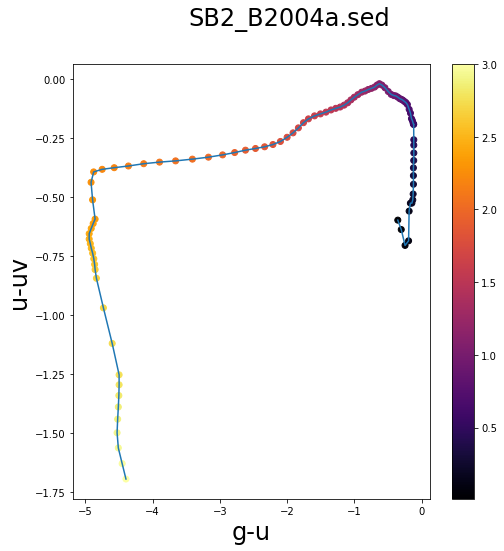

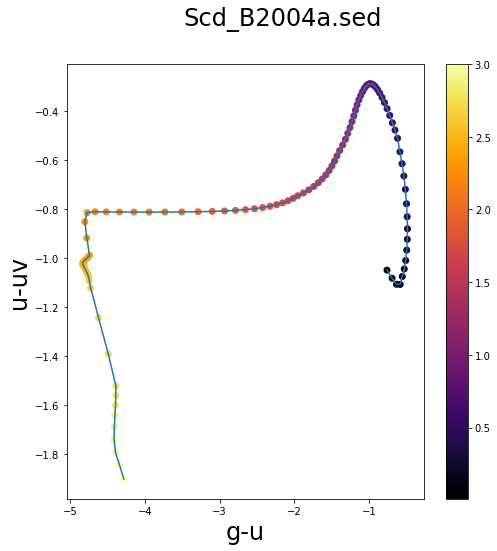

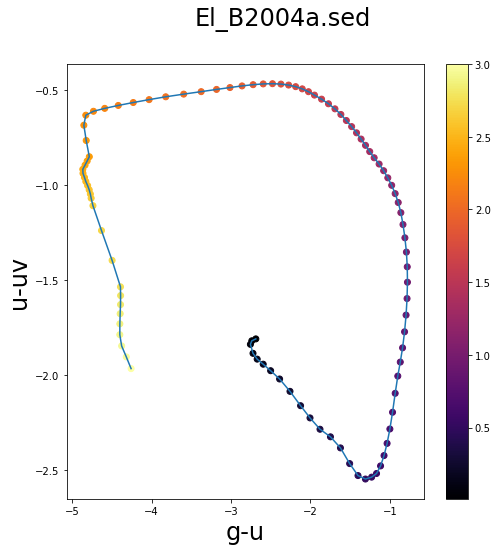

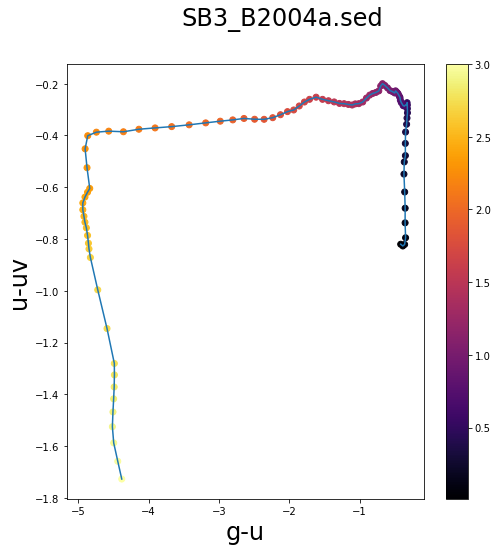

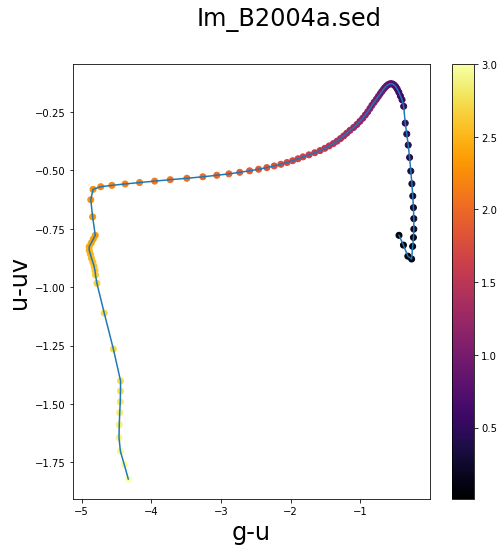

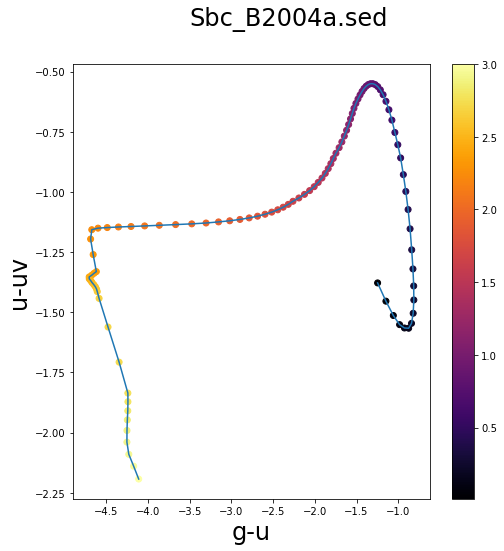

In [415]:
for filename in filelist:
    
    color1 = []
    color2 = []
    
    fig, ax = plt.subplots(1,1, figsize = (8, 8))


    for z in redshifts:
    
        color1.append(mags_dict[filename][z][0]) 
        color2.append(mags_dict[filename][z][1]) 
    
    ax0 = ax.scatter(color1, color2, cmap="inferno", c = redshifts)
    ax.plot(color1, color2)
    ax.set_xlabel('g-u', fontsize = 24)
    ax.set_ylabel('u-uv', fontsize = 24)

    
    fig.suptitle(filename, fontsize = 24)
    
    fig.colorbar(ax0)
    
plt.show()

In [397]:
mags_dict[filename][0.01]

array([-0.38115406, -0.60568336])

In [410]:
Euclid_filters = ['passband_euclid.Y', 'passband_euclid.H', 'passband_euclid.J', 'passband_euclid.VIS']

# waves=pd.read_table(Euclid_filters[0], sep = ' ')[pd.read_table(Euclid_filters[0], sep = ' ').keys()[2]]*1e4

In [416]:
mags = []
mags_dict = {}
redshift_dict = {}

redshifts = np.linspace(0.01, 3, 100)

for template in filelist: 
    
    print(template)
    
    redshift_dict = {}
    
    for z in redshifts:
        
        print(z)
        
        mags = []
    
        for fil in Euclid_filters: 
    
            print(fil)
    
            transmission_wavelength = pd.read_table(fil, sep = ' ')[pd.read_table(fil, sep = ' ').keys()[2]]*1e4
            transmission = pd.read_table(fil, sep = ' ')[pd.read_table(fil, sep = ' ').keys()[4]]
    
            LSST_fil = Filter(transmission_wavelength, transmission, unit='Angstrom')
    
        
            fluxes = LSST_fil.get_flux((1+z)*np.array(templates[template][0]), np.array(templates[template][1])/(4*np.pi*cosmo.luminosity_distance(z).value**2) , axis=0)
    
            ABmag=-2.5*np.log10(fluxes)-LSST_fil.AB_zero_mag
    
            mags.append(ABmag)
        
        redshift_dict[z] = np.diff(np.flip(mags), axis = -1)
        
    mags_dict[template] = redshift_dict

SB2_B2004a.sed
0.01
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.040202020202020204
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.07040404040404041
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.10060606060606062
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.13080808080808082
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.16101010101010105
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.19121212121212125
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.22141414141414145
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.2516161616161616
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.28181818181818186
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3120202020202021
passband_euclid.Y
passband_euclid.H
passb

passband_euclid.J
passband_euclid.VIS
1.036868686868687
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.0670707070707073
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.0972727272727274
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.1274747474747475
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.1576767676767679
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.187878787878788
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2180808080808083
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2482828282828284
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2784848484848486
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.308686868686869
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.338888888888889
passband_euclid.Y

passband_euclid.VIS
2.0335353535353535
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.0637373737373736
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.0939393939393938
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.1241414141414143
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.1543434343434344
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.1845454545454546
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.2147474747474747
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.244949494949495
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.2751515151515154
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3053535353535355
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3355555555555556
passband_euclid.Y
passband_eucli

Scd_B2004a.sed
0.01
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.040202020202020204
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.07040404040404041
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.10060606060606062
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.13080808080808082
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.16101010101010105
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.19121212121212125
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.22141414141414145
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.2516161616161616
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.28181818181818186
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3120202020202021
passband_euclid.Y
passband_euclid.H
passb

1.036868686868687
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.0670707070707073
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.0972727272727274
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.1274747474747475
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.1576767676767679
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.187878787878788
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2180808080808083
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2482828282828284
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2784848484848486
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.308686868686869
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.338888888888889
passband_euclid.Y
passband_euclid.H
passband_euclid.J
p

2.0637373737373736
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.0939393939393938
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.1241414141414143
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.1543434343434344
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.1845454545454546
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.2147474747474747
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.244949494949495
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.2751515151515154
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3053535353535355
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3355555555555556
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3657575757575757
passband_euclid.Y
passband_euclid.H
passband_euclid.

passband_euclid.VIS
0.10060606060606062
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.13080808080808082
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.16101010101010105
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.19121212121212125
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.22141414141414145
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.2516161616161616
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.28181818181818186
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3120202020202021
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.34222222222222226
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3724242424242425
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.40262626262626267
passband_euclid.Y
passb

passband_euclid.VIS
1.1274747474747475
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.1576767676767679
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.187878787878788
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2180808080808083
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2482828282828284
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2784848484848486
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.308686868686869
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.338888888888889
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.3690909090909094
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.3992929292929295
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.4294949494949496
passband_euclid.Y
passband_euclid.

passband_euclid.J
passband_euclid.VIS
2.1845454545454546
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.2147474747474747
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.244949494949495
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.2751515151515154
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3053535353535355
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3355555555555556
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3657575757575757
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.395959595959596
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4261616161616164
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4563636363636365
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4865656565656566
passband_euclid

0.16101010101010105
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.19121212121212125
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.22141414141414145
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.2516161616161616
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.28181818181818186
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3120202020202021
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.34222222222222226
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3724242424242425
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.40262626262626267
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.4328282828282829
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.46303030303030307
passband_euclid.Y
passband_euclid.H
passband

1.187878787878788
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2180808080808083
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2482828282828284
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.2784848484848486
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.308686868686869
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.338888888888889
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.3690909090909094
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.3992929292929295
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.4294949494949496
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.45969696969697
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.48989898989899
passband_euclid.Y
passband_euclid.H
passband_euclid.J
pass

passband_euclid.VIS
2.2751515151515154
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3053535353535355
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3355555555555556
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.3657575757575757
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.395959595959596
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4261616161616164
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4563636363636365
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4865656565656566
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.5167676767676768
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.546969696969697
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.5771717171717174
passband_euclid.Y
passband_euclid

0.2516161616161616
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.28181818181818186
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3120202020202021
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.34222222222222226
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.3724242424242425
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.40262626262626267
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.4328282828282829
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.46303030303030307
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.4932323232323233
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.5234343434343435
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.5536363636363637
passband_euclid.Y
passband_euclid.H
passband_eu

1.3690909090909094
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.3992929292929295
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.4294949494949496
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.45969696969697
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.48989898989899
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.5201010101010104
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.5503030303030305
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.5805050505050506
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.610707070707071
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.640909090909091
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.6711111111111112
passband_euclid.Y
passband_euclid.H
passband_euclid.J
pas

passband_euclid.VIS
2.4261616161616164
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4563636363636365
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.4865656565656566
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.5167676767676768
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.546969696969697
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.5771717171717174
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.6073737373737376
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.6375757575757577
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.667777777777778
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.697979797979798
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.7281818181818185
passband_euclid.Y
passband_euclid.

0.4328282828282829
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.46303030303030307
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.4932323232323233
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.5234343434343435
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.5536363636363637
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.5838383838383839
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.6140404040404042
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.6442424242424243
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.6744444444444445
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.7046464646464647
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
0.734848484848485
passband_euclid.Y
passband_euclid.H
passband_euclid

1.5503030303030305
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.5805050505050506
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.610707070707071
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.640909090909091
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.6711111111111112
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.7013131313131316
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.7315151515151517
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.761717171717172
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.7919191919191921
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.8221212121212123
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
1.8523232323232326
passband_euclid.Y
passband_euclid.H
passband_euclid.J


2.6375757575757577
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.667777777777778
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.697979797979798
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.7281818181818185
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.7583838383838386
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.7885858585858587
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.818787878787879
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.848989898989899
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.8791919191919195
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.9093939393939396
passband_euclid.Y
passband_euclid.H
passband_euclid.J
passband_euclid.VIS
2.9395959595959598
passband_euclid.Y
passband_euclid.H
passband_euclid.J
p

In [430]:
mags_dict['SB2_B2004a.sed'][0.01][1]

-0.04904961107989081

/var/folders/l8/2kslmt113c99klvtjpdbnghm0000gn/T/ipykernel_18834/1089319234.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(ax0)


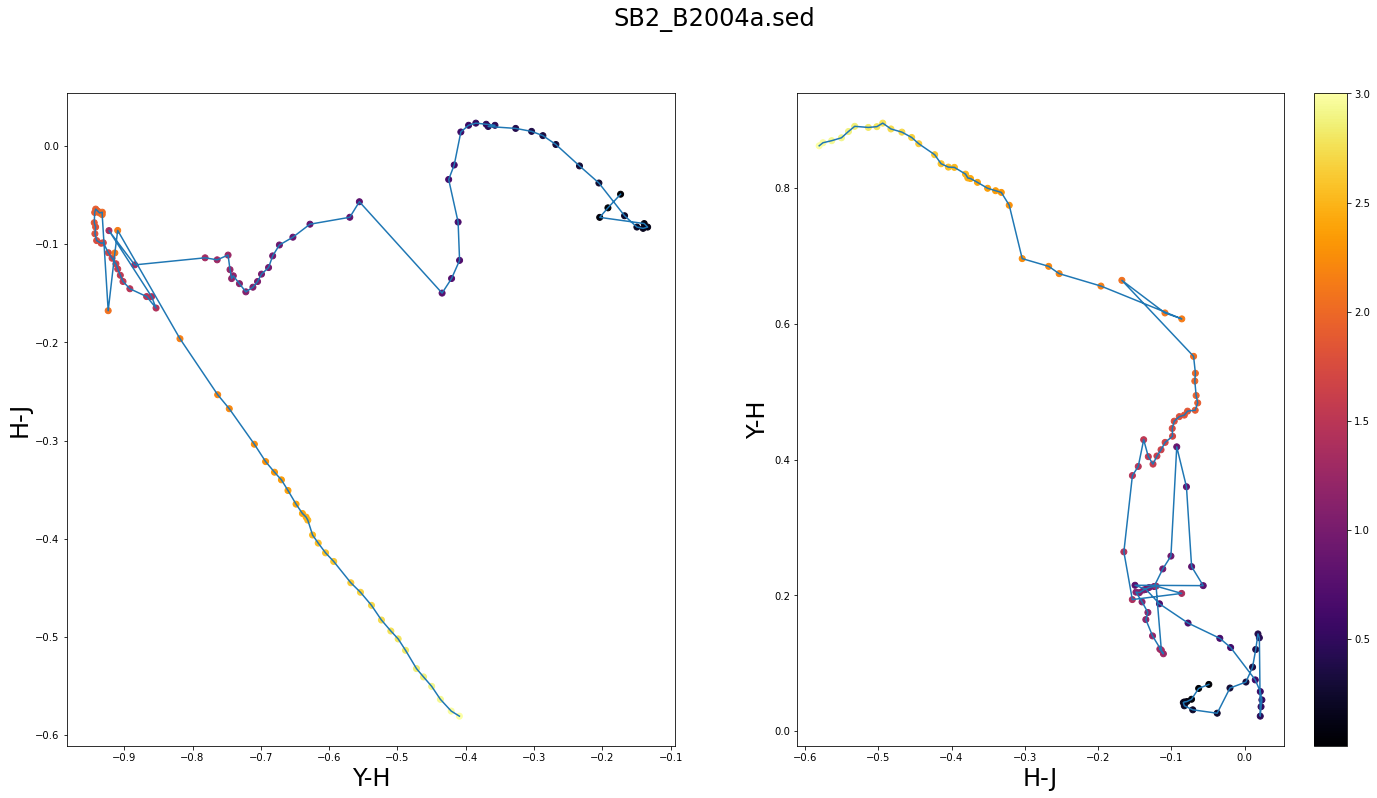

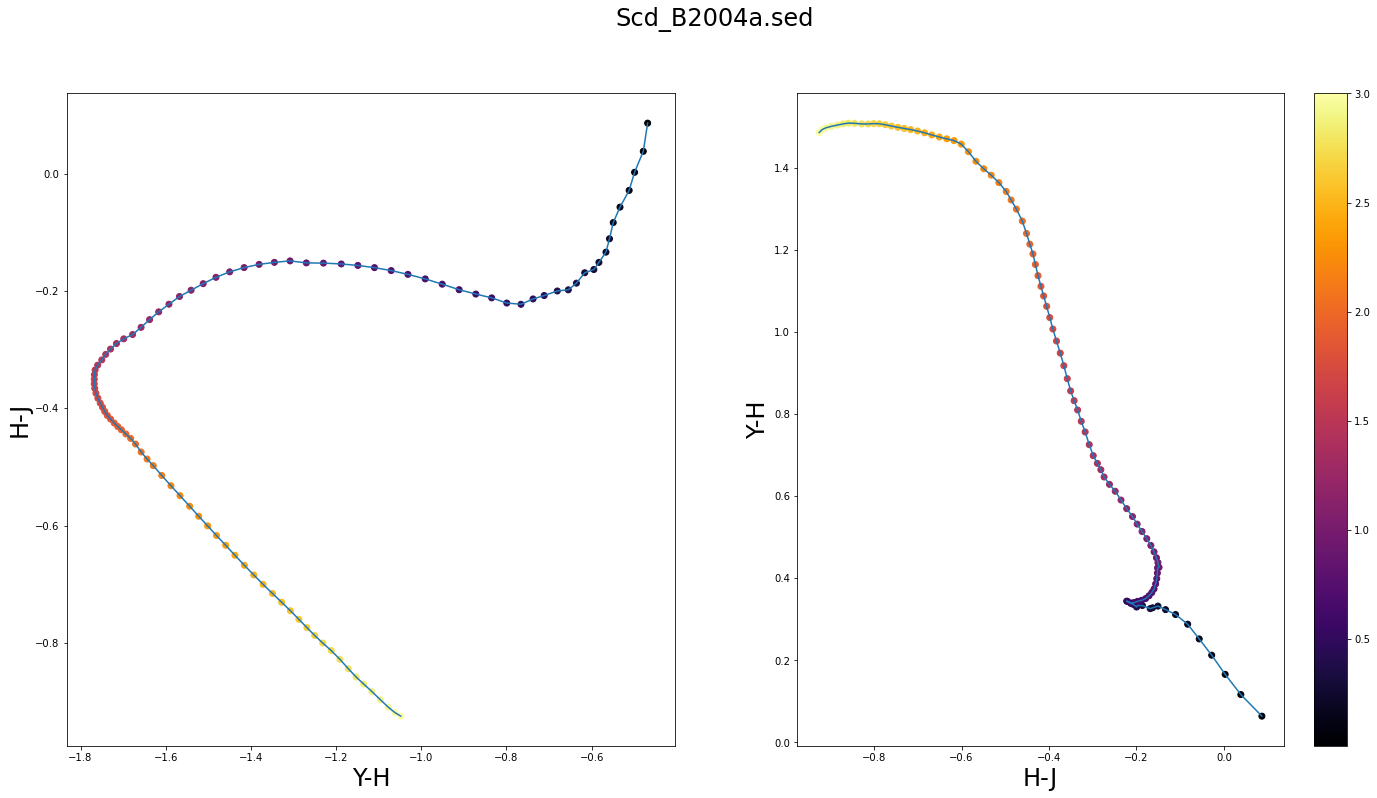

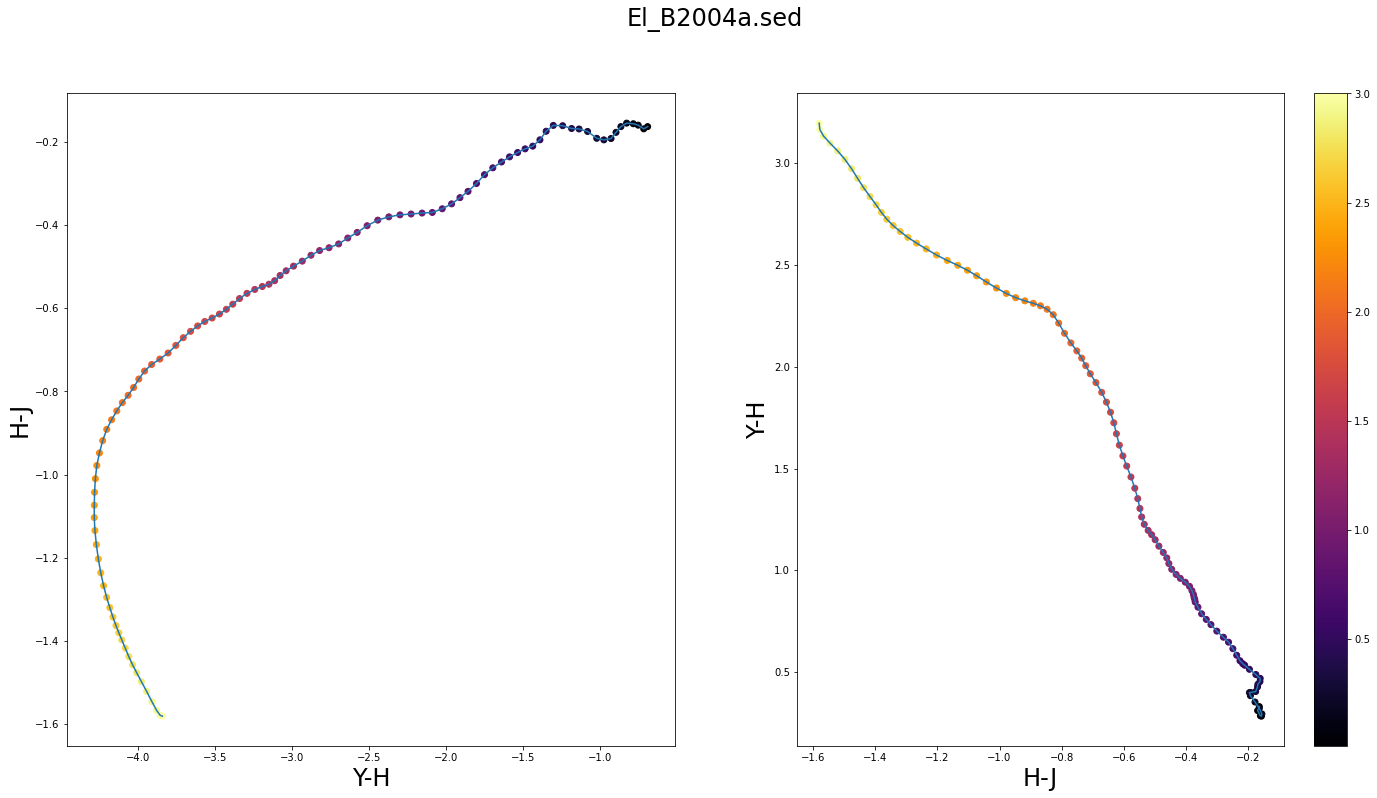

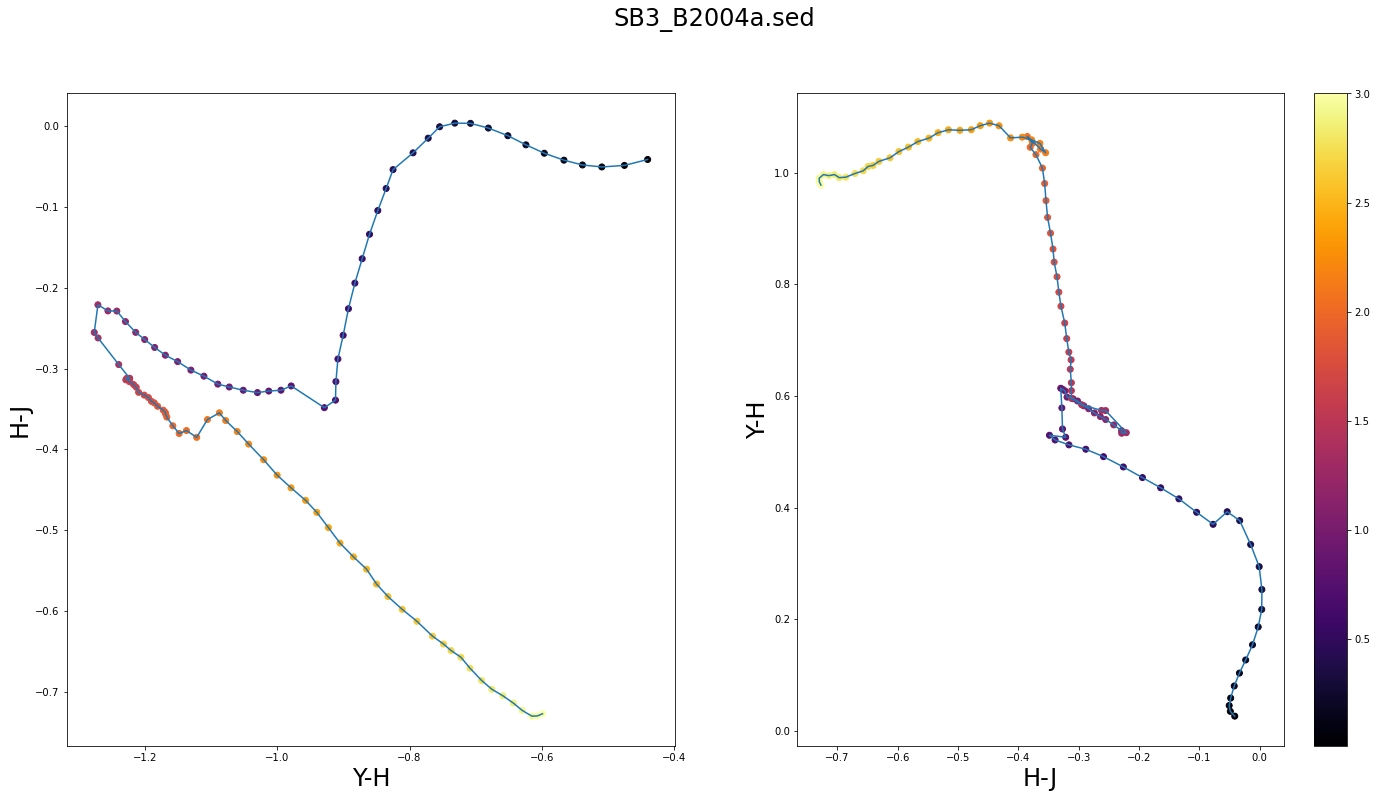

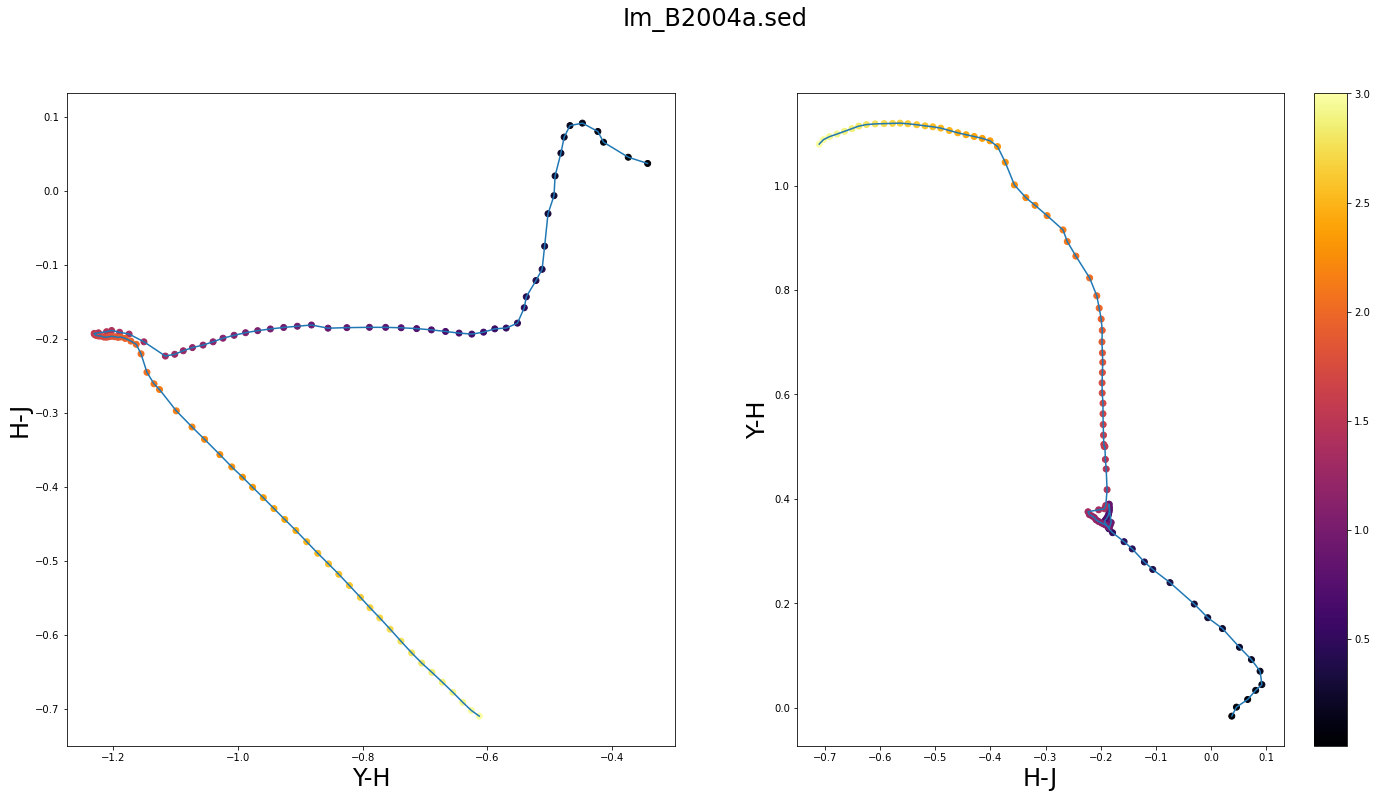

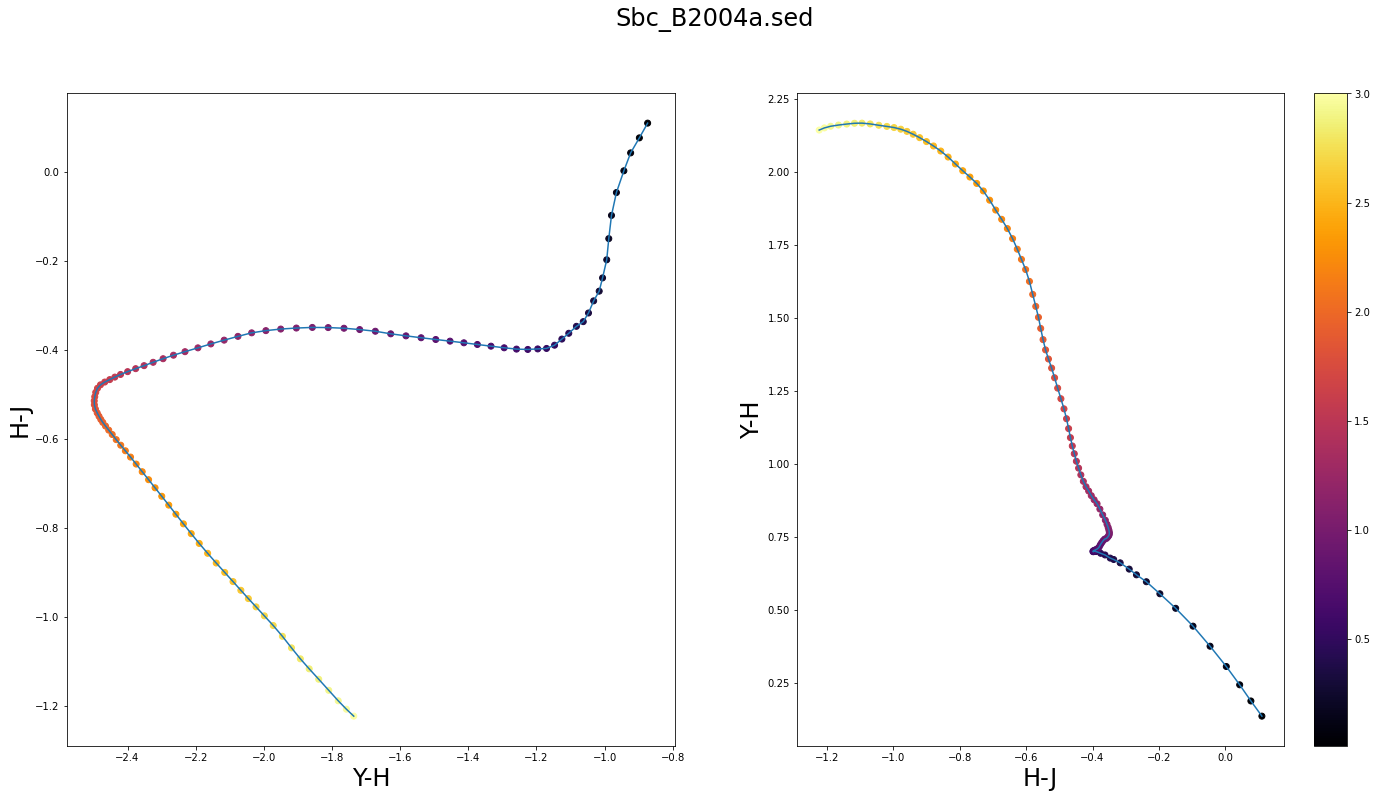

In [431]:
for filename in filelist:
    
    color1 = []
    color2 = []
    
    fig, ax = plt.subplots(1,2, figsize = (24, 12))


    for z in redshifts:
    
        color1.append(mags_dict[filename][z][0]) 
        color2.append(mags_dict[filename][z][1]) 
    
    ax0 = ax[0].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[0].plot(color1, color2)
    ax[0].set_xlabel('Y-H', fontsize = 24)
    ax[0].set_ylabel('H-J', fontsize = 24)

    color1 = []
    color2 = []

    for z in redshifts:
    
        color1.append(mags_dict[filename][z][1]) 
        color2.append(mags_dict[filename][z][2]) 
    
    ax[1].scatter(color1, color2, cmap="inferno", c = redshifts)
    ax[1].plot(color1, color2)
    ax[1].set_xlabel('H-J', fontsize = 24)
    ax[1].set_ylabel('Y-H', fontsize = 24)


    fig.suptitle(filename, fontsize = 24)
    
    fig.colorbar(ax0)
    
plt.show()